# Data Science CoderHouse [Comision 61690]



### Alumno: Juan Francisco Alegre

##Introducción
Analizaremos que clientes existentes del banco portugués tienen mas posiblidades de suscribirse a un deposito a largo plazo, para poder centrar los esfuerzos de marketing en un nicho especifico.

## Descripción del Problema

El banco portugués ha sufrido una caída de ingresos y le gustaría saber qué medidas tomar. Tras una investigación, descubrió que la causa principal era que sus clientes no invertían lo suficiente en depósitos a largo plazo. Intentaremos identificar que clientes son mas propensos a invertir en depósitos a largo plazo para poder mejorar la gestión de los recursos de marketing. En este sentido, el análisis de datos y la construcción de modelos de clasificación pueden proporcionar insights valiosos para mejorar la toma de decisiones.

## Objetivo

El objetivo principal de este trabajo es construir un modelo de clasificación que pueda predecir si un cliente invertira en un depósitos a largo plazo o no. Para lograr este objetivo, se explorará un conjunto de datos relacionado con campañas de marketing, se realizará un análisis exploratorio de los datos para comprender mejor las características y los patrones presentes en ellos.


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification

Este conjunto de datos proporciona información detallada sobre campañas de marketing, esta compuesto por las siguientes columnas:

age (edad del cliente), job (tipo de trabajo), marital (estado civil),
education	(nivel educativo), default	(¿Tiene crédito en mora?), housing	(¿Tiene préstamo para vivienda?), loan	(¿Tiene préstamo personal?), contact	(Tipo de comunicación de contacto), month	(último mes de contacto del año), day_of_week	(último día de contacto de la semana), duration	(Duración del último contacto, en segundos), campaign	(Número de contactos realizados durante esta campaña y para este cliente), pdays	(Número de días transcurridos desde que se contactó por última vez al cliente de una campaña anterior), previous	(Número de contactos realizados antes de esta campaña y para este cliente), poutcome	(resultado de la campaña de marketing anterior), y (¿El cliente ha suscrito un depósito a plazo?)


## Importación de Librerías y Carga de Datos


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
file_path = "/content/drive/MyDrive/Data Science 1 - Coderhouse - Alegre Juan Francisco/Banking Dataset Classification.csv"

In [4]:
df = pd.read_csv(file_path, sep=';')

## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


El conjunto de datos contiene un total de 32.950 filas (registros) y 16 columnas (variables).

Se observa que ninguna columna tiene valores faltantes (non-null es igual que el número total de filas).


---



**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir la inversion a largo plazo de deposito incluyen "age" "job" "education" "default" "housing" "loan" "contact" "duration" "pday".

In [6]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


**age:**
Describe los años de las personas que se contactaron en la campaña.
- El monto promedio de edad es de 40 años.
- El monto mínimo es de 17 años y la edad maxima de 98 años.
- La distribución parece estar concentrada en edades cercanas a los 32-47 años (percentiles 25%-75%).

**duration:**
Duración del último contacto, en segundos.
- El monto promedio de la duración del contacto es de aproximadamente 258 segundos (4 min aprox).
- El monto mínimo es de 0, es decir que no hubo contacto. Y el máximo es de 4918 segundos.
- La desviación estándar es significativa. Esto indica que algunas llamadas son muy breves mientras que otras se extienden bastante.

**campaign:**
Número de contactos realizados durante esta campaña y para este cliente (incluye el último contacto).
- La media es de entre 2 y 3 contactos.
- El minimo fue de 1 contacto y el máximo de 56, esto podría reflejar esfuerzos poco eficientes, ya que demasiados intentos pueden generar rechazo.

**pdays:**
Número de días transcurridos desde que se contactó por última vez al cliente de una campaña anterior (999 significa que el cliente no fue contactado previamente)
- El analisis de esta columna esta influido por el 999.

**previous:**
Número de contactos realizados antes de esta campaña y para este cliente.
- La desviación estándar aquí es baja porque la mayoría de los clientes no fueron contactados previamente (valor 0 en los percentiles 50% y 75%). Sin embargo, hay clientes que fueron contactados hasta 7 veces, lo que genera cierta dispersión.

In [7]:
df[df['y'] == 'yes'].describe()

,age,duration,campaign,pdays,previous
count,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000
mean,40.851293,549.398976,2.054957,790.336207,0.496498
std,13.760020,397.490060,1.656486,404.617231,0.862394
min,17.000000,63.000000,1.000000,0.000000,0.000000
25%,31.000000,252.000000,1.000000,999.000000,0.000000
50%,37.000000,448.000000,2.000000,999.000000,0.000000
75%,50.000000,737.000000,2.000000,999.000000,1.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000


Si analizamos solamente las variables de las personas que terminaron invirtiendo en un depósito a largo plazo, podemos observar que en la edad no varia mucho, pero si en la duracion del contacto. La media es mucho mayor y el minimo es de 63 segundos (1 minuto). Ademas podemos ver que la cantidad de contactos tambien varia de forma significativa, baja la media mas cercana a 2 contactos, el maximo es de 23 contactos contra los 56 anteriores, es decir que podriamos determinar que la cantidad de contactos puede definitivamente generar rechazos.

In [8]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


Aplicamos Arboles de decisión

Accuracy: 0.8678300455235205
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92      5798
           1       0.45      0.45      0.45       792

    accuracy                           0.87      6590
   macro avg       0.69      0.69      0.69      6590
weighted avg       0.87      0.87      0.87      6590



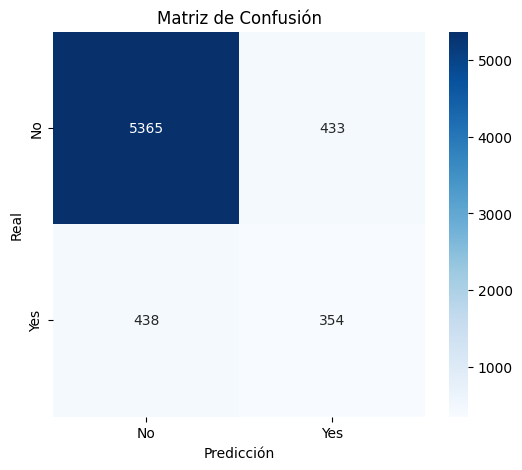

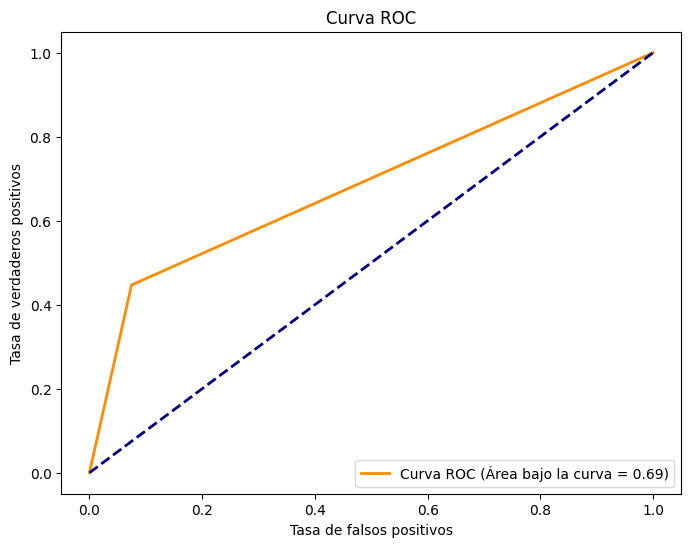

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Cargar los datos
data = pd.read_csv(file_path, sep=';')

# 2. Eliminar la columna 'contact'
data = data.drop(columns=['contact'])

# Separar la columna objetivo antes de aplicar One-Hot Encoding
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convertir la columna objetivo en binaria
X = data.drop(columns=['y'])  # Excluir 'y' de las variables predictoras

# Aplicar One-Hot Encoding solo a las variables predictoras
X = pd.get_dummies(X, drop_first=True)

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área bajo la curva = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Conclusiones.**

Se observa que en forma general el modelo performa de manera correcta con un 87%. Pero en cuanto a los clientes que aceptan la oferta esta por debajo del 50% por lo que deberiamos mejorar el mismo. Vamos a limitar el arbol de decision a 5 niveles para saber si performa mejor.

Aplicamos Arboles de decisión limitado a 5 niveles

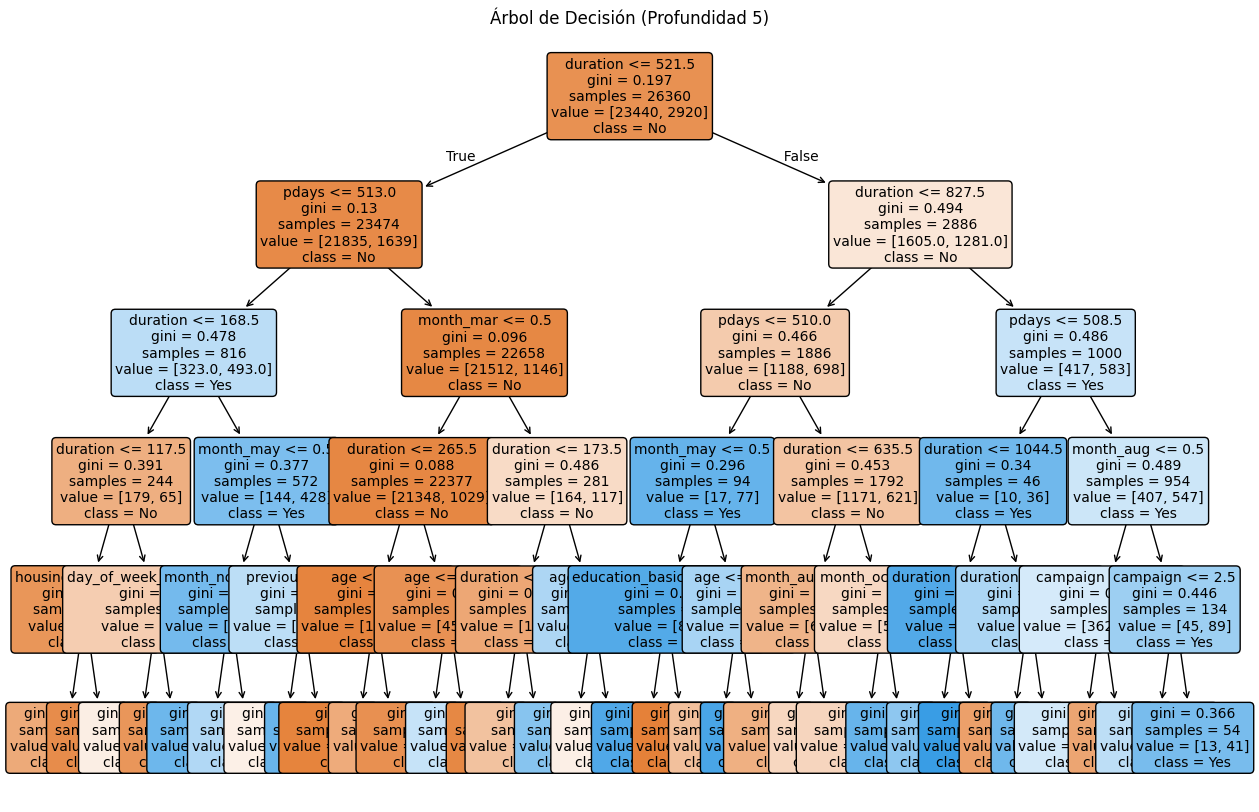

Accuracy: 0.9010622154779969
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      5798
           1       0.64      0.40      0.49       792

    accuracy                           0.90      6590
   macro avg       0.78      0.69      0.72      6590
weighted avg       0.89      0.90      0.89      6590



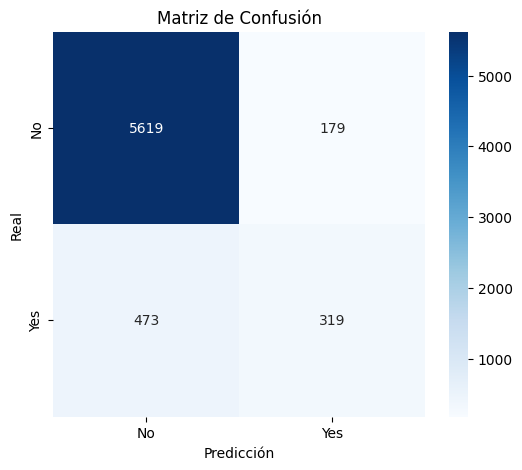

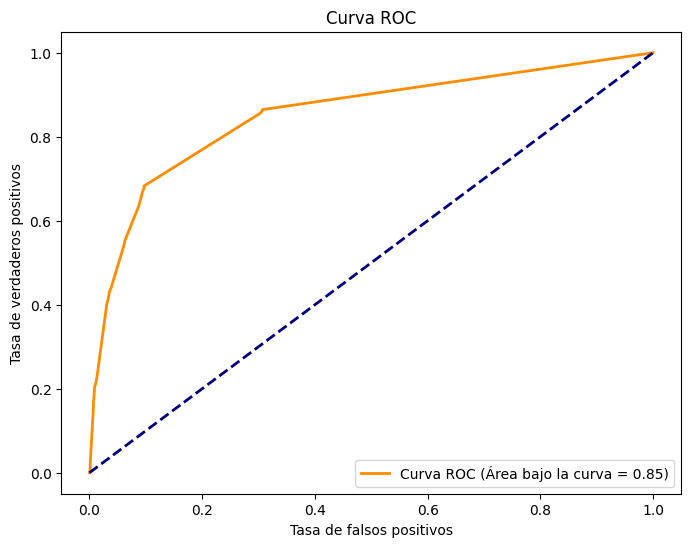

In [10]:
# 1. Cargar los datos
data = pd.read_csv(file_path, sep=';')

# 2. Eliminar la columna 'contact'
data = data.drop(columns=['contact'])

# Separar la columna objetivo antes de aplicar One-Hot Encoding
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convertir la columna objetivo en binaria
X = data.drop(columns=['y'])  # Excluir 'y' de las variables predictoras

# Aplicar One-Hot Encoding solo a las variables predictoras
X = pd.get_dummies(X, drop_first=True)

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión con una profundidad máxima de 5
model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Visualizar el árbol de decisión limitado a 5 niveles
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'],
          rounded=True, fontsize=10)
plt.title('Árbol de Decisión (Profundidad 5)')
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área bajo la curva = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Conclusiones**.

Observamos que mejora el modelo al limitarlo a 5 niveles, ya que el porcentaje de precisión general es de 90%.
La precisión para los clientes que no aceptan es de 92%, lo cual es alto, sin embargo para los que aceptaron es del 64%, mejora en relacion al 45% que obteniamos antes de limitar el modelo.

Vamos a limitar el arbol de decision a *10* niveles para saber si performa mejor.

Aplicamos Arboles de decisión limitado a 10 niveles

Accuracy: 0.9003034901365705
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      5798
           1       0.62      0.44      0.52       792

    accuracy                           0.90      6590
   macro avg       0.77      0.70      0.73      6590
weighted avg       0.89      0.90      0.89      6590



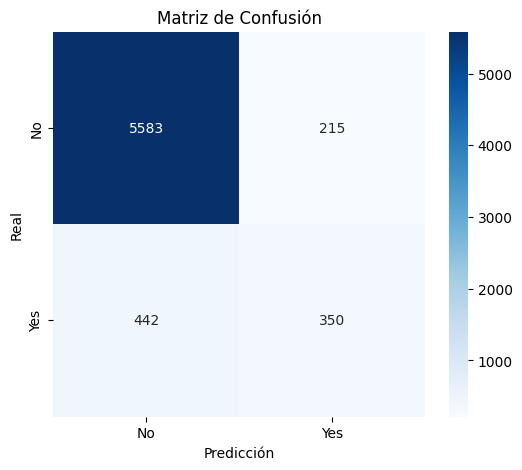

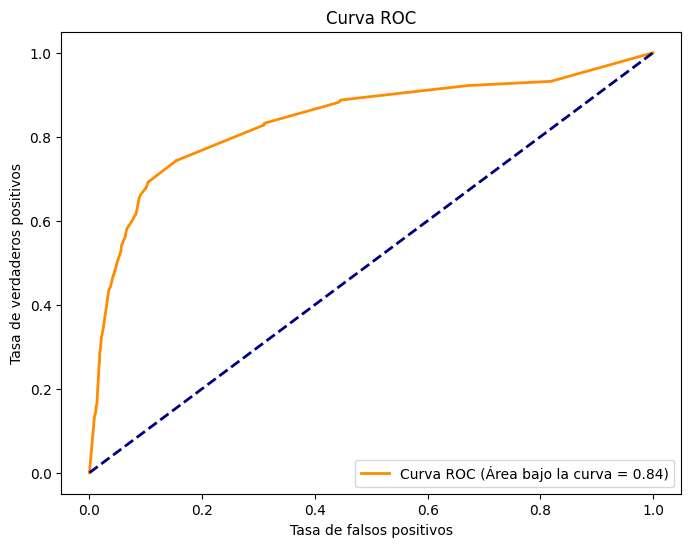

In [11]:
# Cargar los datos
data = pd.read_csv(file_path, sep=';')

# Eliminar la columna 'contact'
data = data.drop(columns=['contact'])

# Separar la columna objetivo antes de aplicar One-Hot Encoding
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convertir la columna objetivo en binaria
X = data.drop(columns=['y'])  # Excluir 'y' de las variables predictoras

# Aplicar One-Hot Encoding solo a las variables predictoras
X = pd.get_dummies(X, drop_first=True)

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión con una profundidad máxima de 10
model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área bajo la curva = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

**Conclusiones.**

Si lo comparamos con el arbol de deciones limitado a 5 niveles no vemos grandes variaciones, es decir que tiene una performance similar. La precisión general es de 90%, aumenta un punto la precision para los que no aceptan la oferta 93% y baja 2 puntos la precision para los que aceptan 62%, sin embargo el Recall de los que aceptan pasa de 40% a 44%. Las metricas son muy parecidas por lo que podriamos quedarnos con el limite de 5 niveles para no generar un overfitting.

Aplicamos Regresion Logistica

Precisión del modelo: 0.9003034901365705
Precisión: 0.6588235294117647
Recall: 0.35353535353535354
F1-Score: 0.4601479046836483
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      5798
           1       0.66      0.35      0.46       792

    accuracy                           0.90      6590
   macro avg       0.79      0.66      0.70      6590
weighted avg       0.89      0.90      0.89      6590



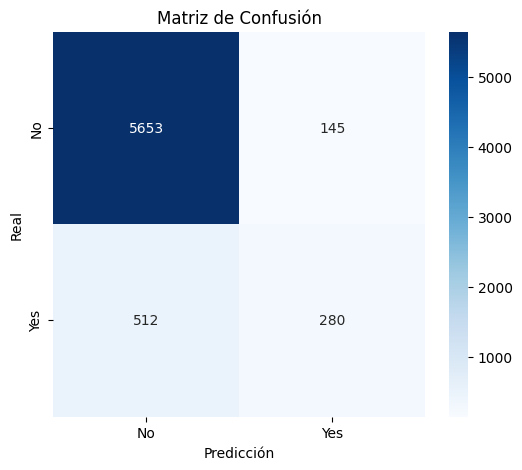

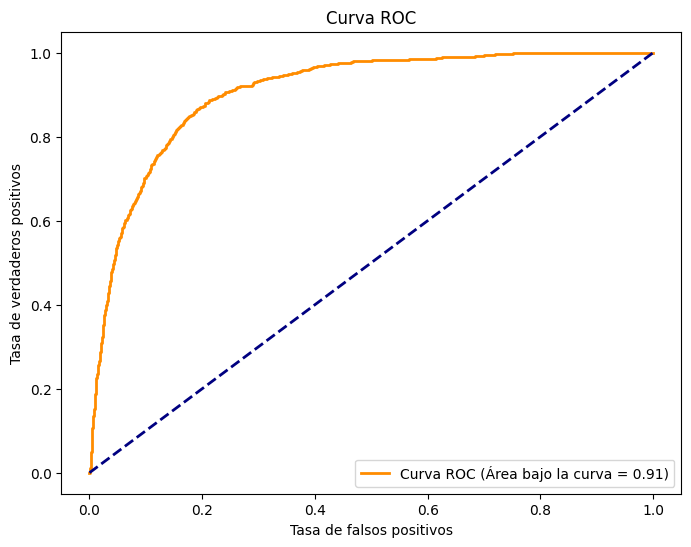

In [12]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report, precision_score, recall_score, f1_score

# Desactivar los warnings de scikit-learn (opcional)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Cargar los datos
data = pd.read_csv(file_path, sep=';')

# Eliminar la columna 'contact'
data = data.drop(columns=['contact'])

# Separar la columna objetivo antes de aplicar One-Hot Encoding
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Convertir la columna objetivo en binaria
X = data.drop(columns=['y'])  # Excluir 'y' de las variables predictoras

# Aplicar One-Hot Encoding solo a las variables predictoras
X = pd.get_dummies(X, drop_first=True)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escalar los datos

# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística con más iteraciones
model = LogisticRegression(max_iter=1000)  # Aumentar el número de iteraciones
model.fit(X_train, y_train)  # Entrenar el modelo

# Predicciones y evaluación del modelo
predicciones = model.predict(X_test)
print("Precisión del modelo:", accuracy_score(y_test, predicciones))

# Métricas como Precision, Recall y F1-Score
precision = precision_score(y_test, predicciones)
recall = recall_score(y_test, predicciones)
f1 = f1_score(y_test, predicciones)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Mostrar el reporte de clasificación
print("Classification Report:\n", classification_report(y_test, predicciones))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (Área bajo la curva = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


**Conclusiones.**

Se observa que en forma general el modelo performa de manera efectiva, con una presion de 90%. Si analizamos los clientes que no aceptaron la oferta podemos determinar que el modelo tiene una presicion de 92%, pero en los clientes que aceptaron la oferta solo de 66%, en promedio ponderado 89%. Lo cual determina que no es tan efectivo en predecir los clientes que van a aceptar la oferta, pero es util, ya que esta por encima del 50%.

El modelo tiene un recall del 97% para los que no aceptaron, lo que significa que el modelo es muy bueno para identificarlos. Sin embargo, el recall para los clientes que aceptaron, es de 35%, lo que significa que el modelo no identifica bien a las personas que realmente aceptan el depósito.

Si observamos la matriz de confusion llegamos a la misma conclusion, el modelo predice de manera efectiva los clientes que no aceptan la oferta 5.653 de 5.798 pero no predice de buena manera los que si aceptaron 280 de 792. Esto se debe a que el data set esta desbalanceado. Es decir solo el 11% del dataset acepto la oferta del deposito.

Si miramos la curva Roc podemos decir que en general el modelo performa de manera efectiva. Pero al analizar las metricas anteriores terminariamos de concluir que deberiamos tomar acciones para balancear el modelo y asi mejorar el mismo.


# **Conclusiones finales**

Si tenemos que seleccionar un modelo para aplicar, seleccionariamos el modelo de arboles de decisión limitado a 5 niveles. Ya que realiza una performace optima. Aunque deberiamos balancear el dataset para poder mejorar el mismo.